## Loading of dataset ##

In [2]:
import pandas as pd
data = pd.read_csv("hotspot_lead.csv")
data

,City,Age,Income_INR,Property_Size_sqft,Budget_INR,Price_INR,Rental_Yield_%,Appreciation_Rate_%,Demand_Index,Inventory_Level,Interest_Rates_%,Days_on_Market,Past_Searches,Inquiry_Frequency,Time_on_Website_Min,Preferred_Purchase_Timeline,Browsing_Frequency,Engagement_Spikes,City_Competitiveness,Hotspot
0,Bangalore,56,7662242,1702.75,384900984,2.512103e+07,4.085571,11.029191,79.943481,161.793649,8.377947,39,14,5,9.421479,12+ Months,9,2,65.564587,No
1,Bangalore,46,5662242,1402.75,284900984,1.059356e+07,4.190191,10.531374,92.260144,151.979691,8.771187,87,38,2,14.659013,6-12 Months,1,3,69.230561,Yes
2,Bangalore,32,2862242,982.75,144900984,8.149758e+06,3.623758,10.209555,76.704647,59.696695,9.330836,130,42,8,7.566635,6-12 Months,1,3,59.119810,No
3,Bangalore,60,8462242,1822.75,424900984,2.157966e+07,4.762999,11.437992,76.914712,145.339687,9.521894,168,11,3,19.826174,4-6 Months,7,2,73.931073,No
4,Bangalore,25,1462242,772.75,74900984,2.305287e+07,3.682312,9.162705,78.132127,94.795390,9.212788,64,27,5,8.344065,12+ Months,5,4,56.593329,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Bangalore,20,462242,622.75,24900984,1.136234e+07,4.663922,14.897811,68.689556,185.754100,9.805237,114,26,1,5.895657,12+ Months,2,2,51.398942,No
4996,Bangalore,47,5862242,1432.75,294900984,2.853652e+07,3.548642,14.347243,56.635757,172.210680,8.349130,68,46,6,19.594555,6-12 Months,8,3,83.569007,No
4997,Bangalore,18,62242,562.75,4900984,2.155882e+07,4.378902,14.739948,71.005902,187.815276,8.716364,71,15,6,15.902624,6-12 Months,7,3,76.130905,No
4998,Bangalore,47,5862242,1432.75,294900984,1.350598e+07,4.672509,13.968695,88.582969,119.889161,8.513426,82,23,2,19.306027,12+ Months,6,1,60.629426,Yes


## Data preprocessing ##

In [3]:
data.isnull().sum()

City                           0
Age                            0
Income_INR                     0
Property_Size_sqft             0
Budget_INR                     0
Price_INR                      0
Rental_Yield_%                 0
Appreciation_Rate_%            0
Demand_Index                   0
Inventory_Level                0
Interest_Rates_%               0
Days_on_Market                 0
Past_Searches                  0
Inquiry_Frequency              0
Time_on_Website_Min            0
Preferred_Purchase_Timeline    0
Browsing_Frequency             0
Engagement_Spikes              0
City_Competitiveness           0
Hotspot                        0
dtype: int64

In [4]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, lognorm, poisson, kstest

## Distribution ##

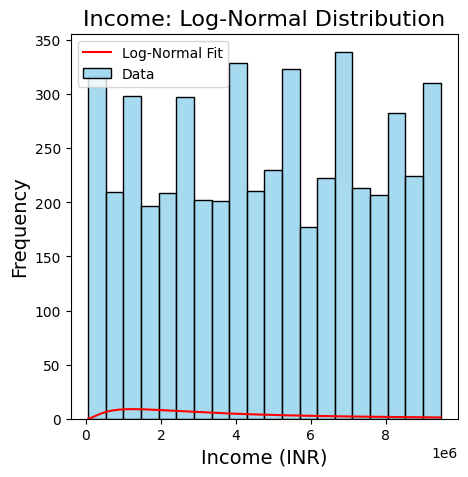

In [8]:

income_data = data['Income_INR']

# Plot the histogram
plt.figure(figsize=(5, 5))
sns.histplot(income_data, bins=20, kde=False, color='skyblue', label='Data')

# Fit and plot the log-normal curve
shape, loc, scale = lognorm.fit(income_data, floc=0)  # Fit log-normal distribution
x = np.linspace(min(income_data), max(income_data), 1000)
pdf = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf * len(income_data) * (x[1] - x[0]), 'r-', label='Log-Normal Fit')

plt.title('Income: Log-Normal Distribution', fontsize=16)
plt.xlabel('Income (INR)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

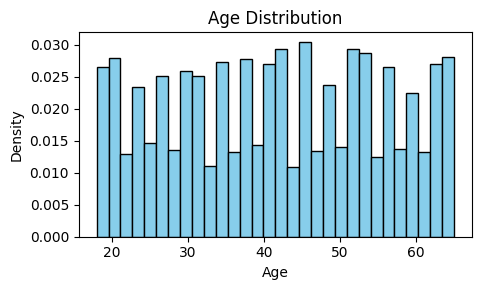

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Histogram 
plt.figure(figsize=(9, 3))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(data['Age'], bins=30, color='skyblue', edgecolor='black', density=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

## Outliers ##

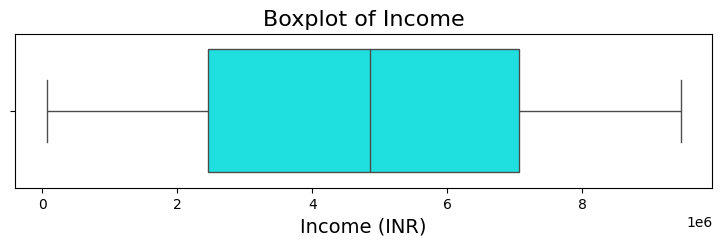

In [10]:
from scipy.stats import skew

# Detect outliers using the IQR method
Q1 = data['Income_INR'].quantile(0.25)
Q3 = data['Income_INR'].quantile(0.75)
IQR = Q3 - Q1                     
lower_bound = Q1 - 1.5 * IQR         
upper_bound = Q3 + 1.5 * IQR        

# Visualize the data with a boxplot
plt.figure(figsize=(9, 2))
sns.boxplot(x=income_data, color='cyan')
plt.title('Boxplot of Income', fontsize=16)
plt.xlabel('Income (INR)', fontsize=14)
plt.show()


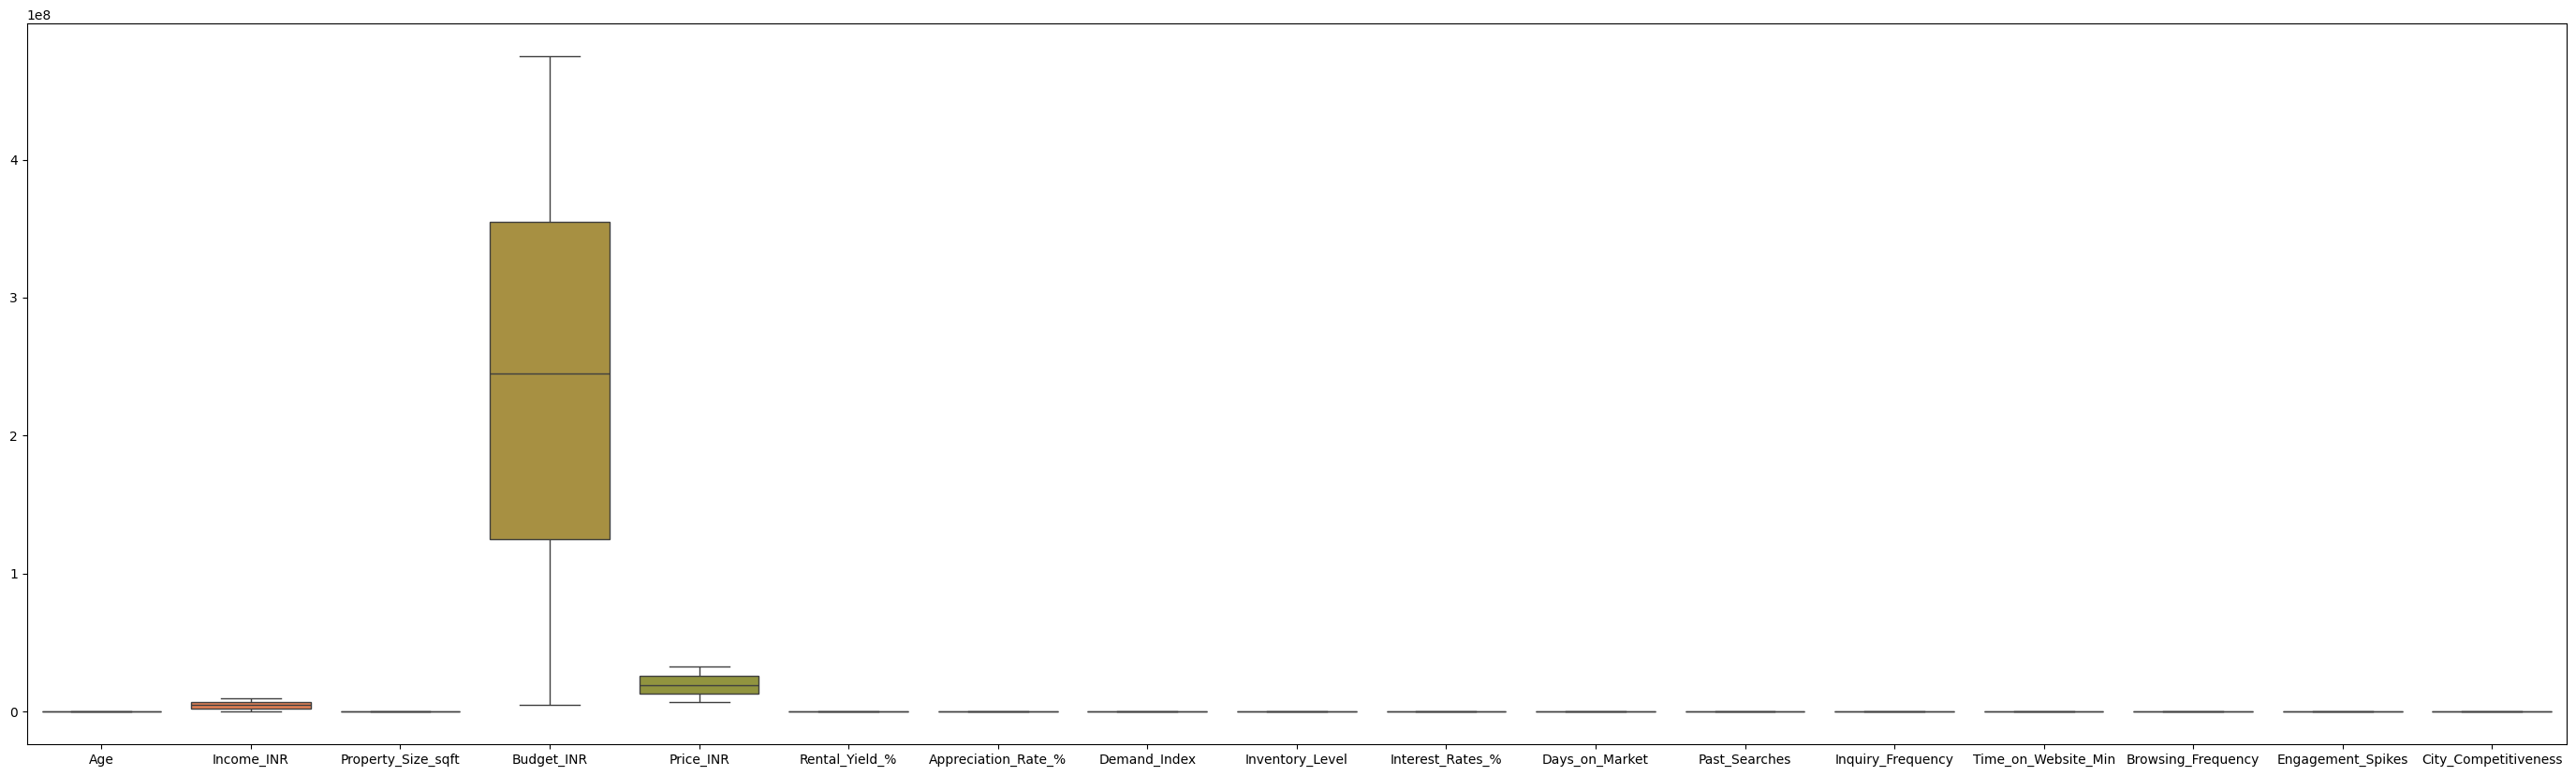

In [11]:
plt.figure(figsize=(35, 10))
sns.boxplot(data=data)
plt.show()

## Correlation ##

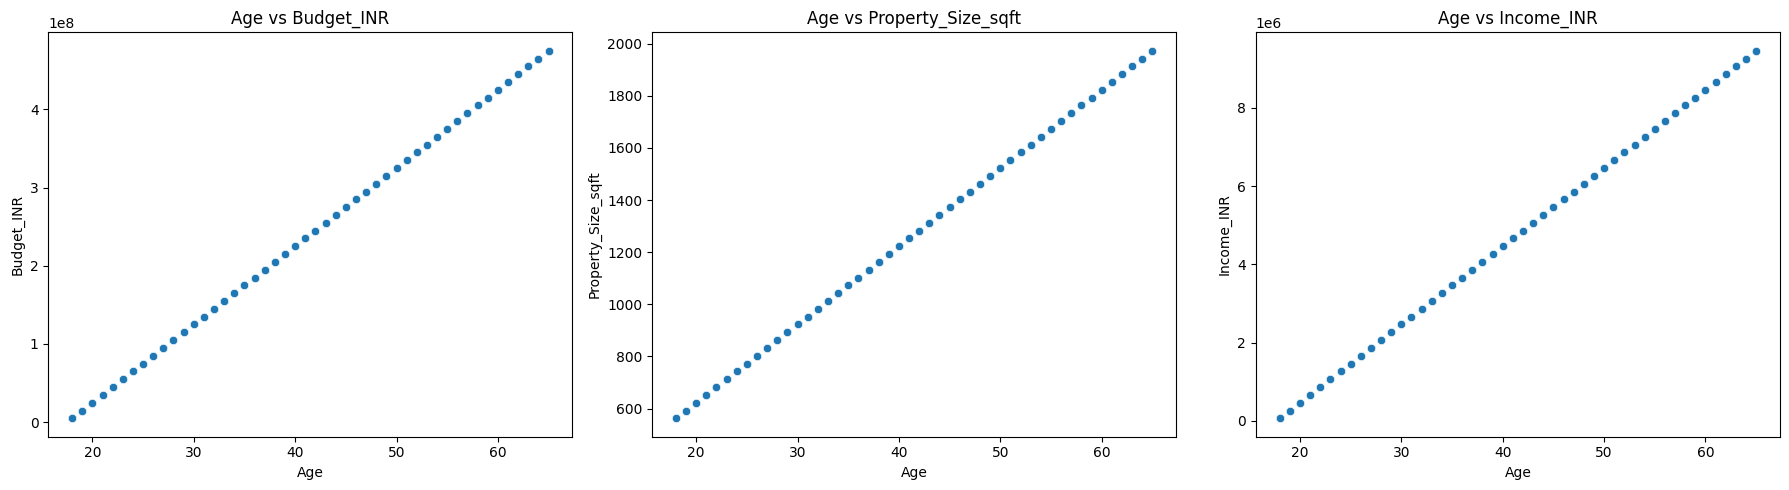

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create correlation plots
plt.figure(figsize=(18, 5))

# Age vs Budget_INR
plt.subplot(1, 3, 1)
sns.scatterplot(x=data['Age'], y=data['Budget_INR'])
plt.title('Age vs Budget_INR')

# Age vs Property_Size_sqft
plt.subplot(1, 3, 2)
sns.scatterplot(x=data['Age'], y=data['Property_Size_sqft'])
plt.title('Age vs Property_Size_sqft')

# Age vs Income_INR
plt.subplot(1, 3, 3)
sns.scatterplot(x=data['Age'], y=data['Income_INR'])
plt.title('Age vs Income_INR')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## Feature encoding ##

In [13]:
import pandas as pd
import numpy as np
data

,City,Age,Income_INR,Property_Size_sqft,Budget_INR,Price_INR,Rental_Yield_%,Appreciation_Rate_%,Demand_Index,Inventory_Level,Interest_Rates_%,Days_on_Market,Past_Searches,Inquiry_Frequency,Time_on_Website_Min,Preferred_Purchase_Timeline,Browsing_Frequency,Engagement_Spikes,City_Competitiveness,Hotspot
0,Bangalore,56,7662242,1702.75,384900984,2.512103e+07,4.085571,11.029191,79.943481,161.793649,8.377947,39,14,5,9.421479,12+ Months,9,2,65.564587,No
1,Bangalore,46,5662242,1402.75,284900984,1.059356e+07,4.190191,10.531374,92.260144,151.979691,8.771187,87,38,2,14.659013,6-12 Months,1,3,69.230561,Yes
2,Bangalore,32,2862242,982.75,144900984,8.149758e+06,3.623758,10.209555,76.704647,59.696695,9.330836,130,42,8,7.566635,6-12 Months,1,3,59.119810,No
3,Bangalore,60,8462242,1822.75,424900984,2.157966e+07,4.762999,11.437992,76.914712,145.339687,9.521894,168,11,3,19.826174,4-6 Months,7,2,73.931073,No
4,Bangalore,25,1462242,772.75,74900984,2.305287e+07,3.682312,9.162705,78.132127,94.795390,9.212788,64,27,5,8.344065,12+ Months,5,4,56.593329,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Bangalore,20,462242,622.75,24900984,1.136234e+07,4.663922,14.897811,68.689556,185.754100,9.805237,114,26,1,5.895657,12+ Months,2,2,51.398942,No
4996,Bangalore,47,5862242,1432.75,294900984,2.853652e+07,3.548642,14.347243,56.635757,172.210680,8.349130,68,46,6,19.594555,6-12 Months,8,3,83.569007,No
4997,Bangalore,18,62242,562.75,4900984,2.155882e+07,4.378902,14.739948,71.005902,187.815276,8.716364,71,15,6,15.902624,6-12 Months,7,3,76.130905,No
4998,Bangalore,47,5862242,1432.75,294900984,1.350598e+07,4.672509,13.968695,88.582969,119.889161,8.513426,82,23,2,19.306027,12+ Months,6,1,60.629426,Yes


In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Inquiry_Frequency'
data["Hotspot"] = label_encoder.fit_transform(data["Hotspot"])
data["Preferred_Purchase_Timeline"] = label_encoder.fit_transform(data["Preferred_Purchase_Timeline"])


In [15]:
data

,City,Age,Income_INR,Property_Size_sqft,Budget_INR,Price_INR,Rental_Yield_%,Appreciation_Rate_%,Demand_Index,Inventory_Level,Interest_Rates_%,Days_on_Market,Past_Searches,Inquiry_Frequency,Time_on_Website_Min,Preferred_Purchase_Timeline,Browsing_Frequency,Engagement_Spikes,City_Competitiveness,Hotspot
0,Bangalore,56,7662242,1702.75,384900984,2.512103e+07,4.085571,11.029191,79.943481,161.793649,8.377947,39,14,5,9.421479,1,9,2,65.564587,0
1,Bangalore,46,5662242,1402.75,284900984,1.059356e+07,4.190191,10.531374,92.260144,151.979691,8.771187,87,38,2,14.659013,3,1,3,69.230561,1
2,Bangalore,32,2862242,982.75,144900984,8.149758e+06,3.623758,10.209555,76.704647,59.696695,9.330836,130,42,8,7.566635,3,1,3,59.119810,0
3,Bangalore,60,8462242,1822.75,424900984,2.157966e+07,4.762999,11.437992,76.914712,145.339687,9.521894,168,11,3,19.826174,2,7,2,73.931073,0
4,Bangalore,25,1462242,772.75,74900984,2.305287e+07,3.682312,9.162705,78.132127,94.795390,9.212788,64,27,5,8.344065,1,5,4,56.593329,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Bangalore,20,462242,622.75,24900984,1.136234e+07,4.663922,14.897811,68.689556,185.754100,9.805237,114,26,1,5.895657,1,2,2,51.398942,0
4996,Bangalore,47,5862242,1432.75,294900984,2.853652e+07,3.548642,14.347243,56.635757,172.210680,8.349130,68,46,6,19.594555,3,8,3,83.569007,0
4997,Bangalore,18,62242,562.75,4900984,2.155882e+07,4.378902,14.739948,71.005902,187.815276,8.716364,71,15,6,15.902624,3,7,3,76.130905,0
4998,Bangalore,47,5862242,1432.75,294900984,1.350598e+07,4.672509,13.968695,88.582969,119.889161,8.513426,82,23,2,19.306027,1,6,1,60.629426,1


## Class imbalance (SMOTE Analysis)

In [16]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Split data into features (X) and target (y)
X = data[['Rental_Yield_%', 'Appreciation_Rate_%', 'Demand_Index', 'Price_INR']]
y = data['Hotspot']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name='Hotspot')

# Combine features and target for inspection
data_1= pd.concat([X_resampled_df, y_resampled_df], axis=1)


In [17]:
data_1

,Rental_Yield_%,Appreciation_Rate_%,Demand_Index,Price_INR,Hotspot
0,4.085571,11.029191,79.943481,2.512103e+07,0
1,4.190191,10.531374,92.260144,1.059356e+07,1
2,3.623758,10.209555,76.704647,8.149758e+06,0
3,4.762999,11.437992,76.914712,2.157966e+07,0
4,3.682312,9.162705,78.132127,2.305287e+07,0
...,...,...,...,...,...
9079,4.237161,13.680790,83.261973,8.446838e+06,1
9080,4.481929,11.543667,90.417043,1.457093e+07,1
9081,4.753178,12.330071,98.629019,1.268286e+07,1
9082,4.678308,13.442670,90.837654,1.105592e+07,1


## Hotspot property prediction (classification modelling) ##

In [18]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X = data_1[['Rental_Yield_%', 'Appreciation_Rate_%', 'Demand_Index', 'Price_INR']]
y = data_1['Hotspot'] 

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Models
models = {
    'Random forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'XGB Classifier': xgb.XGBClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Train and Evaluate Models
results = []

for name, model_1 in models.items():
    # Train the model
    model_1.fit(X_train, y_train)
    
    # Predict on test data
    y_pred_1 = model_1.predict(X_test)
    
    # Calculate Metrics
    Accuracy=accuracy_score(y_test, y_pred_1)
    Classification_Report = classification_report(y_test, y_pred_1, output_dict=False)
    
    
    # Append results
    results.append({'Model': name, 'Accuracy': Accuracy})

    print(f"Classification Report for {name}:\n")
    print(Classification_Report)
    print("-" * 50)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

Classification Report for Random forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       934
           1       1.00      1.00      1.00       883

    accuracy                           1.00      1817
   macro avg       1.00      1.00      1.00      1817
weighted avg       1.00      1.00      1.00      1817

--------------------------------------------------
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       934
           1       0.76      0.89      0.82       883

    accuracy                           0.81      1817
   macro avg       0.82      0.81      0.81      1817
weighted avg       0.82      0.81      0.81      1817

--------------------------------------------------
Classification Report for SVM:

              precision    recall  f1-score   support

           0       1.00      0.56      0.72       934
           1 



#Confusion matrix

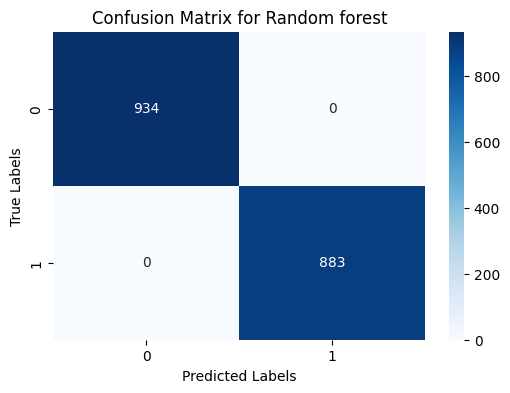

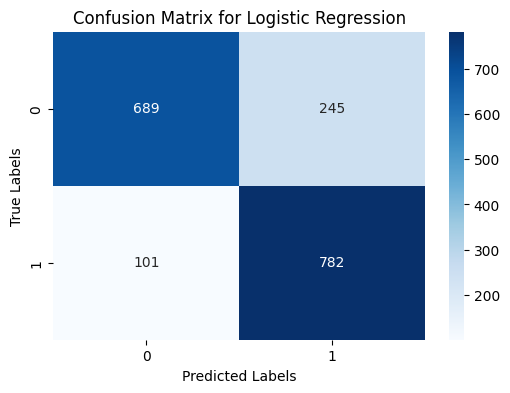

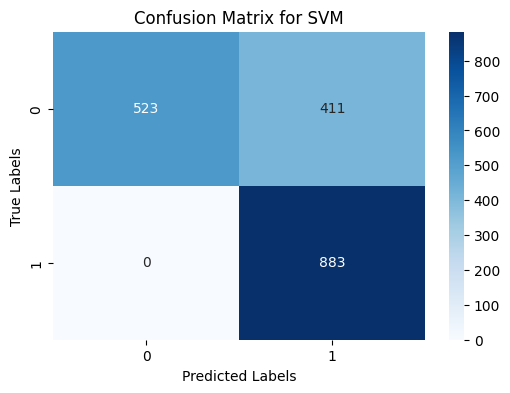

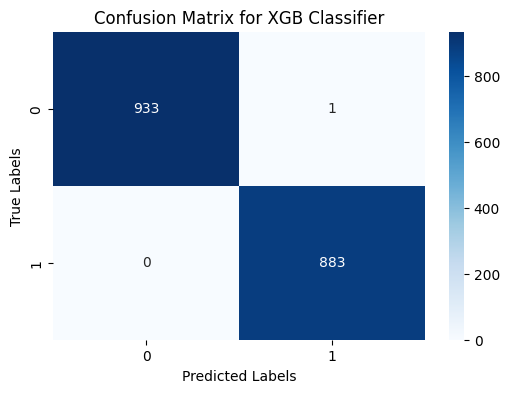

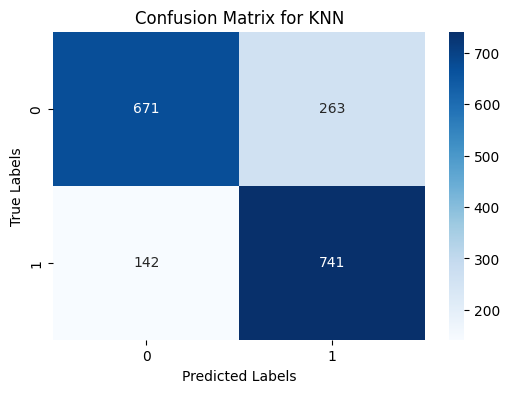

In [19]:
 # Train and Evaluate Models
results = []

for name, model_1 in models.items():
    # Train the model
    model_1.fit(X_train, y_train)
    
    # Predict on test data
    y_pred_1 = model_1.predict(X_test)
    
    # Calculate Metrics
    Accuracy = accuracy_score(y_test, y_pred_1)
    results.append({'Model': name, 'Accuracy': Accuracy})
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred_1)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()



#ROC CURVE AND AUC SCORE

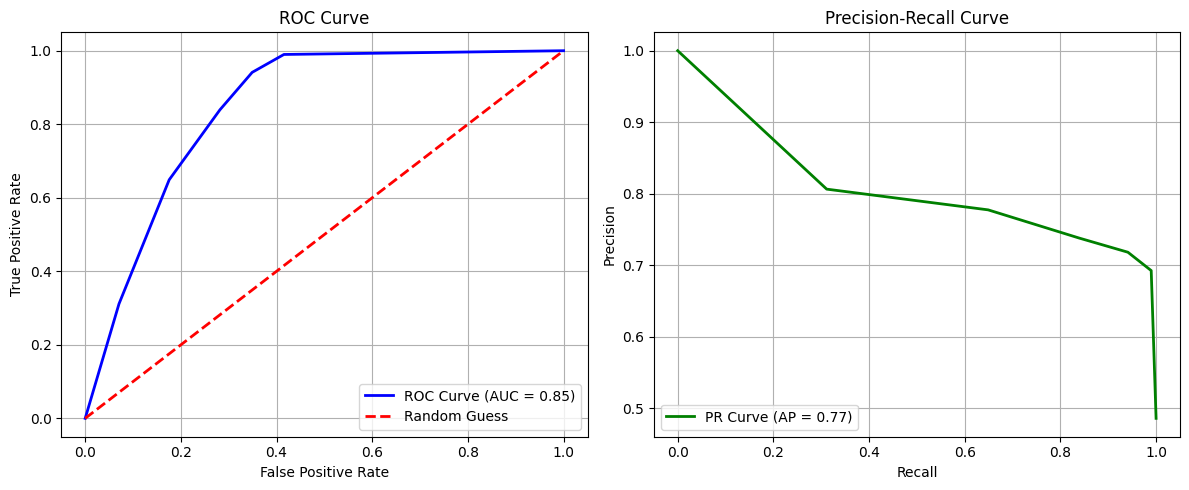

ROC AUC Score: 0.85
Average Precision Score: 0.77


In [20]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities for ROC
y_probs = model_1.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, roc_thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Compute PR curve and Average Precision (AP) score
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(12, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid()

# Subplot 2: PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label=f"PR Curve (AP = {average_precision:.2f})")
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.grid()

plt.tight_layout()
plt.show()

# Print the AUC and AP scores
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Average Precision Score: {average_precision:.2f}")

## ROI Prediction (Regression modelling)

In [21]:
data_1['ROI'] = ((data_1['Appreciation_Rate_%'] + data_1['Rental_Yield_%']) / 100) * data_1['Price_INR']
data_1

,Rental_Yield_%,Appreciation_Rate_%,Demand_Index,Price_INR,Hotspot,ROI
0,4.085571,11.029191,79.943481,2.512103e+07,0,3.796984e+06
1,4.190191,10.531374,92.260144,1.059356e+07,1,1.559538e+06
2,3.623758,10.209555,76.704647,8.149758e+06,0,1.127382e+06
3,4.762999,11.437992,76.914712,2.157966e+07,0,3.496119e+06
4,3.682312,9.162705,78.132127,2.305287e+07,0,2.961145e+06
...,...,...,...,...,...,...
9079,4.237161,13.680790,83.261973,8.446838e+06,1,1.513500e+06
9080,4.481929,11.543667,90.417043,1.457093e+07,1,2.335079e+06
9081,4.753178,12.330071,98.629019,1.268286e+07,1,2.166645e+06
9082,4.678308,13.442670,90.837654,1.105592e+07,1,2.003441e+06


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Normalize only the selected features
columns_to_normalize = ['Appreciation_Rate_%', 'Rental_Yield_%','ROI']

# Normalize and update the original data_1 DataFrame
for column in columns_to_normalize:
    data_1[column] = scaler.fit_transform(data_1[[column]])

# Display the updated data_1 with normalized columns
data_1

,Rental_Yield_%,Appreciation_Rate_%,Demand_Index,Price_INR,Hotspot,ROI
0,0.390410,0.432695,79.943481,2.512103e+07,0,0.538711
1,0.460166,0.361569,92.260144,1.059356e+07,1,0.138721
2,0.082495,0.315589,76.704647,8.149758e+06,0,0.061464
3,0.842088,0.491102,76.914712,2.157966e+07,0,0.484925
4,0.121536,0.166020,78.132127,2.305287e+07,0,0.389287
...,...,...,...,...,...,...
9079,0.491484,0.811543,83.261973,8.446838e+06,1,0.130491
9080,0.654683,0.506201,90.417043,1.457093e+07,1,0.277365
9081,0.835540,0.618559,98.629019,1.268286e+07,1,0.247254
9082,0.785620,0.777522,90.837654,1.105592e+07,1,0.218078


In [23]:
data_1.head(20)

,Rental_Yield_%,Appreciation_Rate_%,Demand_Index,Price_INR,Hotspot,ROI
0,0.390410,0.432695,79.943481,2.512103e+07,0,0.538711
1,0.460166,0.361569,92.260144,1.059356e+07,1,0.138721
2,0.082495,0.315589,76.704647,8.149758e+06,0,0.061464
3,0.842088,0.491102,76.914712,2.157966e+07,0,0.484925
4,0.121536,0.166020,78.132127,2.305287e+07,0,0.389287
5,0.483502,0.440642,99.806007,1.012341e+07,1,0.136997
6,0.382997,0.941844,55.236610,1.886431e+07,0,0.489452
7,0.512333,0.027303,90.276331,1.452931e+07,0,0.183566
8,0.887577,0.164662,63.677427,3.068920e+07,0,0.627153
9,0.989196,0.777700,68.070517,1.229108e+07,0,0.264827


In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

X = data_1[['Rental_Yield_%', 'Appreciation_Rate_%','Price_INR']]
y = data_1['ROI'] 

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Models
models = {
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Linear Regression': LinearRegression(),
    'XGB Regressor': XGBRegressor(random_state=42),
    'RandomForest Regressor': RandomForestRegressor(random_state=42)
}

# Train and Evaluate Models
results = []

for name, model_2 in models.items():
    # Train the model
    model_2.fit(X_train, y_train)
    
    # Predict on test data
    y_pred_2 = model_2.predict(X_test)
    
    # Calculate Metrics
    mse = mean_squared_error(y_test, y_pred_2)
    r2 = r2_score(y_test, y_pred_2)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_2)
   
    
    # Append results
    results.append({'Model': name, 'MSE': mse, 'R²': r2, 'rmse':rmse, 'mae':mae})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


                    Model       MSE        R²      rmse       mae
0        Ridge Regression  0.000562  0.986260  0.023713  0.016306
1        Lasso Regression  0.004005  0.902128  0.063287  0.046846
2           Decision Tree  0.000973  0.976219  0.031196  0.023889
3       Linear Regression  0.000562  0.986267  0.023707  0.016320
4           XGB Regressor  0.000027  0.999343  0.005184  0.003715
5  RandomForest Regressor  0.000032  0.999208  0.005692  0.003753


## Lead Score Prediction (Regression modelling)

In [25]:
roi_threshold = 10  

def calculate_lead_score(row):
    if row['Hotspot'] == 1 and row['ROI'] > roi_threshold:
        return 100  # High lead score
    elif row['Hotspot'] == 1 and row['ROI'] <= roi_threshold:
        return 70  # Medium lead score
    elif row['Hotspot'] == 0 and row['ROI'] > roi_threshold:
        return 50  # Medium-low lead score
    else:
        return 20  # Low lead score

data_1['Lead_Score'] = data_1.apply(calculate_lead_score, axis=1)


In [26]:
data_1

,Rental_Yield_%,Appreciation_Rate_%,Demand_Index,Price_INR,Hotspot,ROI,Lead_Score
0,0.390410,0.432695,79.943481,2.512103e+07,0,0.538711,20
1,0.460166,0.361569,92.260144,1.059356e+07,1,0.138721,70
2,0.082495,0.315589,76.704647,8.149758e+06,0,0.061464,20
3,0.842088,0.491102,76.914712,2.157966e+07,0,0.484925,20
4,0.121536,0.166020,78.132127,2.305287e+07,0,0.389287,20
...,...,...,...,...,...,...,...
9079,0.491484,0.811543,83.261973,8.446838e+06,1,0.130491,70
9080,0.654683,0.506201,90.417043,1.457093e+07,1,0.277365,70
9081,0.835540,0.618559,98.629019,1.268286e+07,1,0.247254,70
9082,0.785620,0.777522,90.837654,1.105592e+07,1,0.218078,70


In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

X = data_1[['ROI','Hotspot']]
y = data_1['Lead_Score'] 

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Models
models = {
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Linear Regression': LinearRegression(),
    'XGB Regressor': XGBRegressor(random_state=42),
    'RandomForest Regressor': RandomForestRegressor(random_state=42)
}

# Train and Evaluate Models
results = []

for name, model_3 in models.items():
    # Train the model
    model_3.fit(X_train, y_train)
    
    # Predict on test data
    y_pred_3 = model_3.predict(X_test)
    
    # Calculate Metrics
    mse = mean_squared_error(y_test, y_pred_3)
    r2 = r2_score(y_test, y_pred_3)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_3)
   
    
    # Append results
    results.append({'Model': name, 'MSE': mse, 'R²': r2, 'rmse':rmse, 'mae':mae})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


                    Model           MSE        R²          rmse           mae
0        Ridge Regression  2.290664e-04  1.000000  1.513494e-02  1.376391e-02
1        Lasso Regression  4.002167e-02  0.999936  2.000542e-01  2.000492e-01
2           Decision Tree  0.000000e+00  1.000000  0.000000e+00  0.000000e+00
3       Linear Regression  6.741917e-28  1.000000  2.596520e-14  2.324222e-14
4           XGB Regressor  9.560857e-11  1.000000  9.777963e-06  9.590279e-06
5  RandomForest Regressor  0.000000e+00  1.000000  0.000000e+00  0.000000e+00


In [28]:
import numpy as np

# Assuming 'Lead_Score' is a column in data_1
column_data = data_1['Lead_Score']

# Number of bootstrap iterations
n_iterations = 1000
bootstrap_means = []

# Perform bootstrapping
for _ in range(n_iterations):
    # Create a bootstrap sample
    bootstrap_sample = np.random.choice(column_data, size=len(column_data), replace=True)
    
    # Compute the mean of the bootstrap sample
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate statistics
mean_estimate = np.mean(bootstrap_means)
lower_ci = np.percentile(bootstrap_means, 2.5)  # 2.5th percentile for 95% CI
upper_ci = np.percentile(bootstrap_means, 97.5)  # 97.5th percentile for 95% CI

print(f"Bootstrap Mean Estimate: {mean_estimate}")
print(f"95% Confidence Interval: ({lower_ci}, {upper_ci})")


Bootstrap Mean Estimate: 45.004810656098634
95% Confidence Interval: (44.52086085424923, 45.49551409070894)


In [29]:
# Calculate the standard error of the bootstrap means
standard_error = np.std(bootstrap_means)
print(f"Standard Error (Uncertainty): {standard_error:.4f}")


Standard Error (Uncertainty): 0.2603


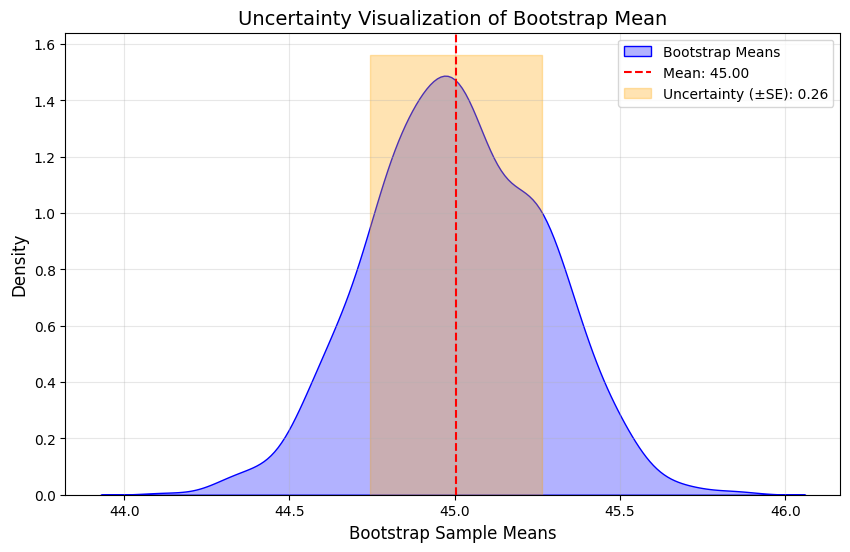

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the standard error
standard_error = np.std(bootstrap_means)

# Plot the bootstrap means as a density curve
plt.figure(figsize=(10, 6))
sns.kdeplot(bootstrap_means, color='blue', fill=True, alpha=0.3, label='Bootstrap Means')

# Add the mean line
plt.axvline(mean_estimate, color='red', linestyle='--', label=f'Mean: {mean_estimate:.2f}')

# Add shaded uncertainty region (mean ± SE)
plt.fill_betweenx(
    y=[0, plt.gca().get_ylim()[1]],
    x1=mean_estimate - standard_error,
    x2=mean_estimate + standard_error,
    color='orange',
    alpha=0.3,
    label=f'Uncertainty (±SE): {standard_error:.2f}'
)

# Add labels and title
plt.title('Uncertainty Visualization of Bootstrap Mean', fontsize=14)
plt.xlabel('Bootstrap Sample Means', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.show()


In [31]:
real_data=pd.read_csv('real_data.csv')

In [32]:
real_data.head()

,Lead_Name,Property_Name,Location,Rental_Yield_%,Appreciation_Rate_%,Total_Inventory,Dimensions,Price_INR,Demand_Index
0,Aarav Sharma,Godrej Bengal Lamps,"Budigere Cross, Old Madras road",4,13,4000,1100,11000000,72
1,Vihaan Mehta,SLN Nidhi Palms,Budigere Road,3,15,81,1200,20000000,68
2,Ishaan Patel,Brigade Calista,Budigere Cross,3,12,1518,1197,10773000,90
3,Riya Verma,Sattva Bliss,Budigere Cross,2,15,"1,014",848,6784000,80
4,Meera Choudhary,Orchid Platinum,Whitefield Main Road,3,15,1000,1380,16560000,55


In [33]:
X_real = real_data[["Rental_Yield_%", "Appreciation_Rate_%", "Demand_Index", "Price_INR"]]
X_real

,Rental_Yield_%,Appreciation_Rate_%,Demand_Index,Price_INR
0,4,13,72,11000000
1,3,15,68,20000000
2,3,12,90,10773000
3,2,15,80,6784000
4,3,15,55,16560000
5,4,14,51,11700000
6,3,16,78,12485000
7,4,15,57,12661000
8,3,18,53,11500000
9,3,18,59,11500000


In [34]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Normalize only the selected features
columns_to_normalize = ['Appreciation_Rate_%', 'Rental_Yield_%']

# Normalize and update the original data_1 DataFrame
for column in columns_to_normalize:
   X_real[column] = scaler.fit_transform(X_real[[column]])

# Display the updated data_1 with normalized columns
X_real

C:\Users\Admin\AppData\Local\Temp\ipykernel_11448\524608785.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_real[column] = scaler.fit_transform(X_real[[column]])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11448\524608785.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_real[column] = scaler.fit_transform(X_real[[column]])


,Rental_Yield_%,Appreciation_Rate_%,Demand_Index,Price_INR
0,1.0,0.166667,72,11000000
1,0.5,0.500000,68,20000000
2,0.5,0.000000,90,10773000
3,0.0,0.500000,80,6784000
4,0.5,0.500000,55,16560000
5,1.0,0.333333,51,11700000
6,0.5,0.666667,78,12485000
7,1.0,0.500000,57,12661000
8,0.5,1.000000,53,11500000
9,0.5,1.000000,59,11500000


In [35]:
 y_real = model_1.predict(X_real)

In [36]:
y_real

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [37]:
X_roi=real_data[["Rental_Yield_%", "Appreciation_Rate_%", "Price_INR"]]

In [38]:
y_roi = model_2.predict(X_roi)

In [39]:
y_roi

array([0.24280913, 0.55609622, 0.23228323, 0.0926396 , 0.4460301 ,
       0.27516436, 0.30019291, 0.30041277, 0.26258459, 0.26258459])

In [41]:
Lead_Data=pd.read_csv('PRED_LEAD.csv')

In [42]:
Lead_Data

,Lead_Name,Property_Name,Location,Hotspot,ROI
0,Aarav Sharma,Godrej Bengal Lamps,"Budigere Cross, Old Madras road",0,0.242809
1,Vihaan Mehta,SLN Nidhi Palms,Budigere Road,0,0.556096
2,Ishaan Patel,Brigade Calista,Budigere Cross,1,0.232283
3,Riya Verma,Sattva Bliss,Budigere Cross,0,0.092640
4,Meera Choudhary,Orchid Platinum,Whitefield Main Road,1,0.446030
5,Ananya Iyer,ELV Highgarden,"Borewell Road,Whitefield",1,0.275164
6,Kavya Nair,Prestige Lavender Fields,"Gunjur, Varthur Road",0,0.300193
7,Arjun Reddy,Prestige Serenity Shores,"Gunjur, Varthur Road",1,0.300413
8,Devansh Thakur,Orchid Life,"Gunjur, Varthur Road",1,0.262585
9,Tanvi Joshi,Brigade Sanctury,"Dommasandra, Sarjapur Road",1,0.262585


In [43]:
x_lead=Lead_Data[['ROI', 'Hotspot']]

In [44]:
y_lead = model_3.predict(x_lead)

In [45]:
y_lead

array([20., 20., 70., 20., 70., 70., 20., 70., 70., 70.])

In [46]:
indices = [761, 7480, 8507, 960, 7195, 8106, 1322, 5835, 4480, 4414]  
y_test_sample = y_test.loc[indices] 


In [47]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_sample, y_lead)
print(f"Accuracy on 10 samples: {accuracy * 100:.2f}%")


Accuracy on 10 samples: 70.00%


In [48]:
import pickle as pkl
file_name = "Hotspot_model.sav"
pkl.dump( model_1, open(file_name,"wb"))

In [49]:
file_name = "ROI_model.sav"
pkl.dump( model_2, open(file_name,"wb"))

In [50]:
file_name = "Lead_Score_model.sav"
pkl.dump( model_3, open(file_name,"wb"))